In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import  matplotlib.pyplot as plt  
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("data.csv", encoding='latin1')

df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [9]:
df.shape

(1303, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [12]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [13]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [14]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [15]:
df[df.duplicated()].shape

(0, 13)

In [17]:
df['Product'].head(5)

0    MacBook Pro
1    Macbook Air
2         250 G6
3    MacBook Pro
4    MacBook Pro
Name: Product, dtype: object

In [18]:
df.Product.value_counts()

Product
XPS 13                                   30
Inspiron 3567                            29
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
17-ak001nv (A6-9220/4GB/500GB/Radeon      1
Name: count, Length: 618, dtype: int64

In [19]:
df['Inches'].median()

np.float64(15.6)

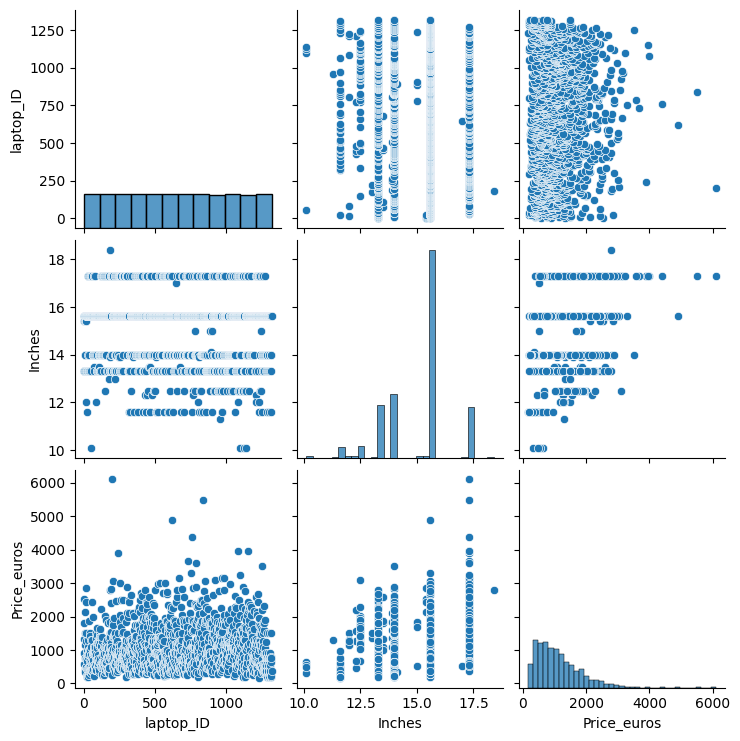

In [20]:
sns.pairplot(df)

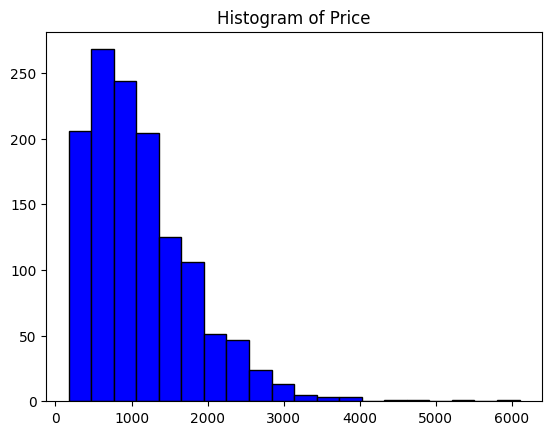

In [22]:
plt.hist(df['Price_euros'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Price')

plt.show()

In [23]:
numerical=[_ for _ in df.columns if df[_].dtype=="int64"]
numerical

['laptop_ID']

In [24]:
newdf = df.select_dtypes(include='int64')
newdf.head(5)

,laptop_ID
0,1
1,2
2,3
3,4
4,5


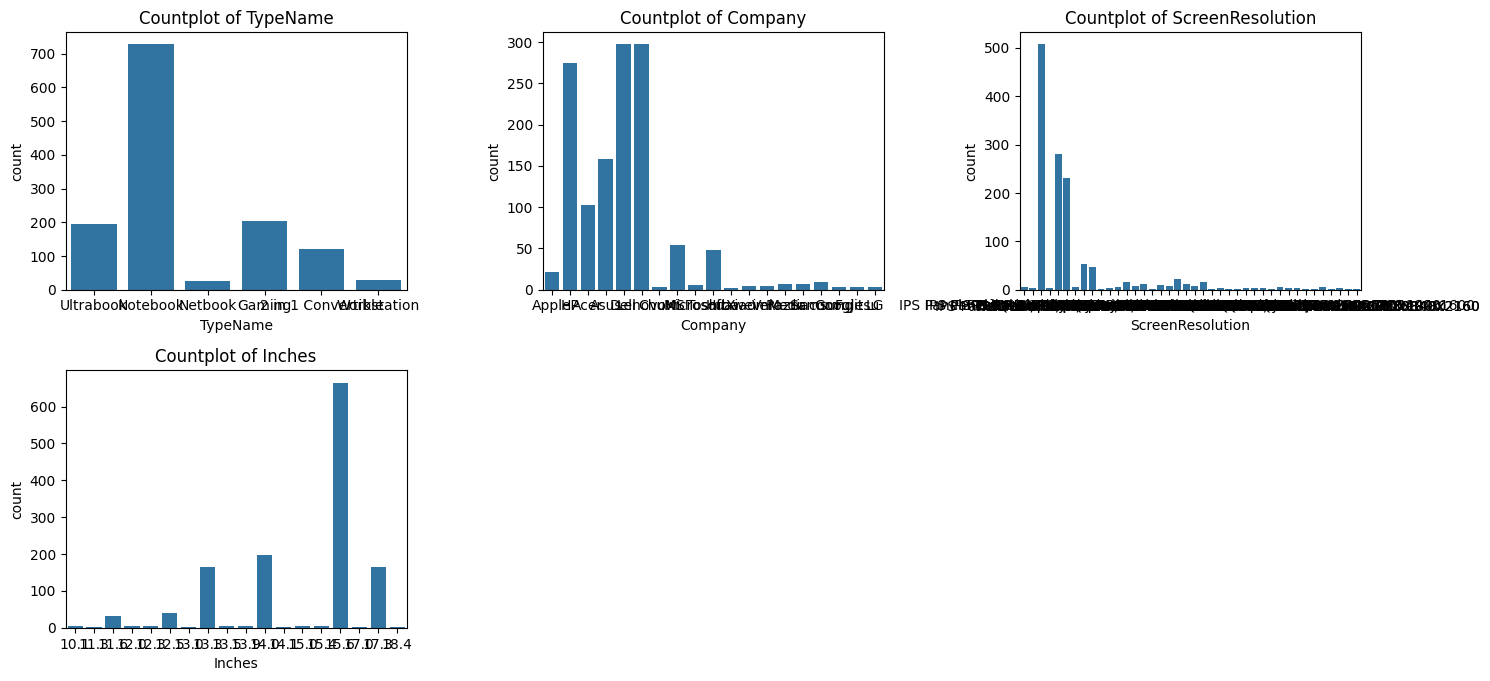

In [ ]:
plt.figure(figsize=(15,20))

for i, col in enumerate(['TypeName', 'Company', 'ScreenResolution', 'Inches']):
    plt.subplot(6,3,i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

<Figure size 1500x2000 with 0 Axes>

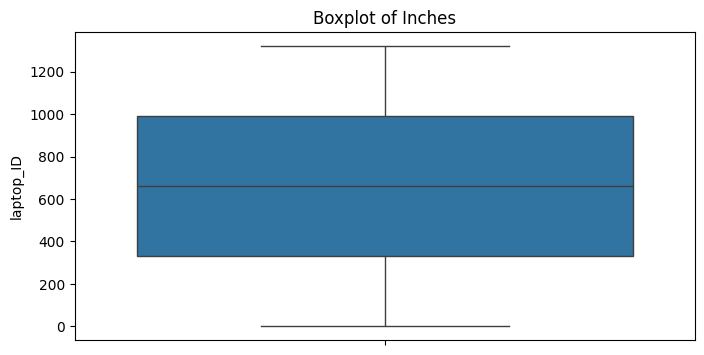

In [29]:
plt.figure(figsize=(15,20))

for _ in numerical:
    plt.figure(figsize=(8,4))
    sns.boxplot(y = df[_])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [30]:
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Price_euros'] > lower_bound) & (df['Price_euros'] < upper_bound)]

<Axes: ylabel='Price_euros'>

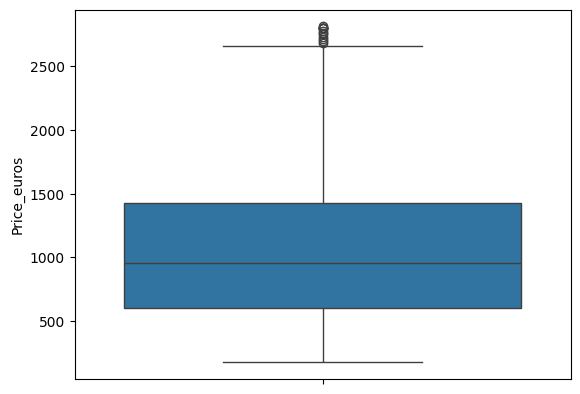

In [31]:
sns.boxplot(y = df['Price_euros'])

In [32]:
df.shape

(1274, 13)